In [35]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

from scipy.stats import norm
import xgboost as xgb
import lightgbm as lgbm

In [2]:
file_path = '2023_lar.csv'
data = pd.read_csv(file_path)

C:\Users\Game\AppData\Local\Temp\ipykernel_39556\4038638108.py:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
df = data.copy()

In [4]:
df.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,549300WN576XI5QFH005,26420.0,TX,48201.0,4.820143e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,6091.0,42.13,94100.0,227.35,1123.0,1275.0,18.0
1,2023,549300WN576XI5QFH005,99999.0,TX,48349.0,4.834997e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4388.0,48.63,73200.0,69.53,972.0,1711.0,48.0
2,2023,549300WN576XI5QFH005,18580.0,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5859.0,67.47,77400.0,117.39,1480.0,1771.0,18.0
3,2023,549300WN576XI5QFH005,19124.0,TX,48113.0,4.811302e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,5275.0,68.40,105600.0,121.30,1826.0,1994.0,36.0
4,2023,549300WN576XI5QFH005,19124.0,TX,48113.0,4.811302e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,6801.0,89.50,105600.0,73.47,1866.0,2210.0,26.0


## EDA:

In [5]:
'''
DENIAL REASONS

1 - Debt-to-income ratio
2 - Employment history
3 - Credit history
4 - Collateral
5 - Insufficient cash (downpayment, closing costs)
6 - Unverifiable information
7 - Credit application incomplete
8 - Mortgage insurance denied
9 - Other
10 - Not applicable
'''

'\nDENIAL REASONS\n\n1 - Debt-to-income ratio\n2 - Employment history\n3 - Credit history\n4 - Collateral\n5 - Insufficient cash (downpayment, closing costs)\n6 - Unverifiable information\n7 - Credit application incomplete\n8 - Mortgage insurance denied\n9 - Other\n10 - Not applicable\n'

In [6]:
df.isna().sum()
'''
df is way too big to analyze as a whole (with msno atleast)

'''

'\ndf is way too big to analyze as a whole (with msno atleast)\n\n'

In [7]:
# Missingness (Probably important)

In [8]:
# split into 3 equal groups of 33
num_columns_per_group = 33

first_group = df.columns[:num_columns_per_group]
middle_group = df.columns[num_columns_per_group:2 * num_columns_per_group]
last_group = df.columns[2 * num_columns_per_group:3 * num_columns_per_group]

<Axes: >

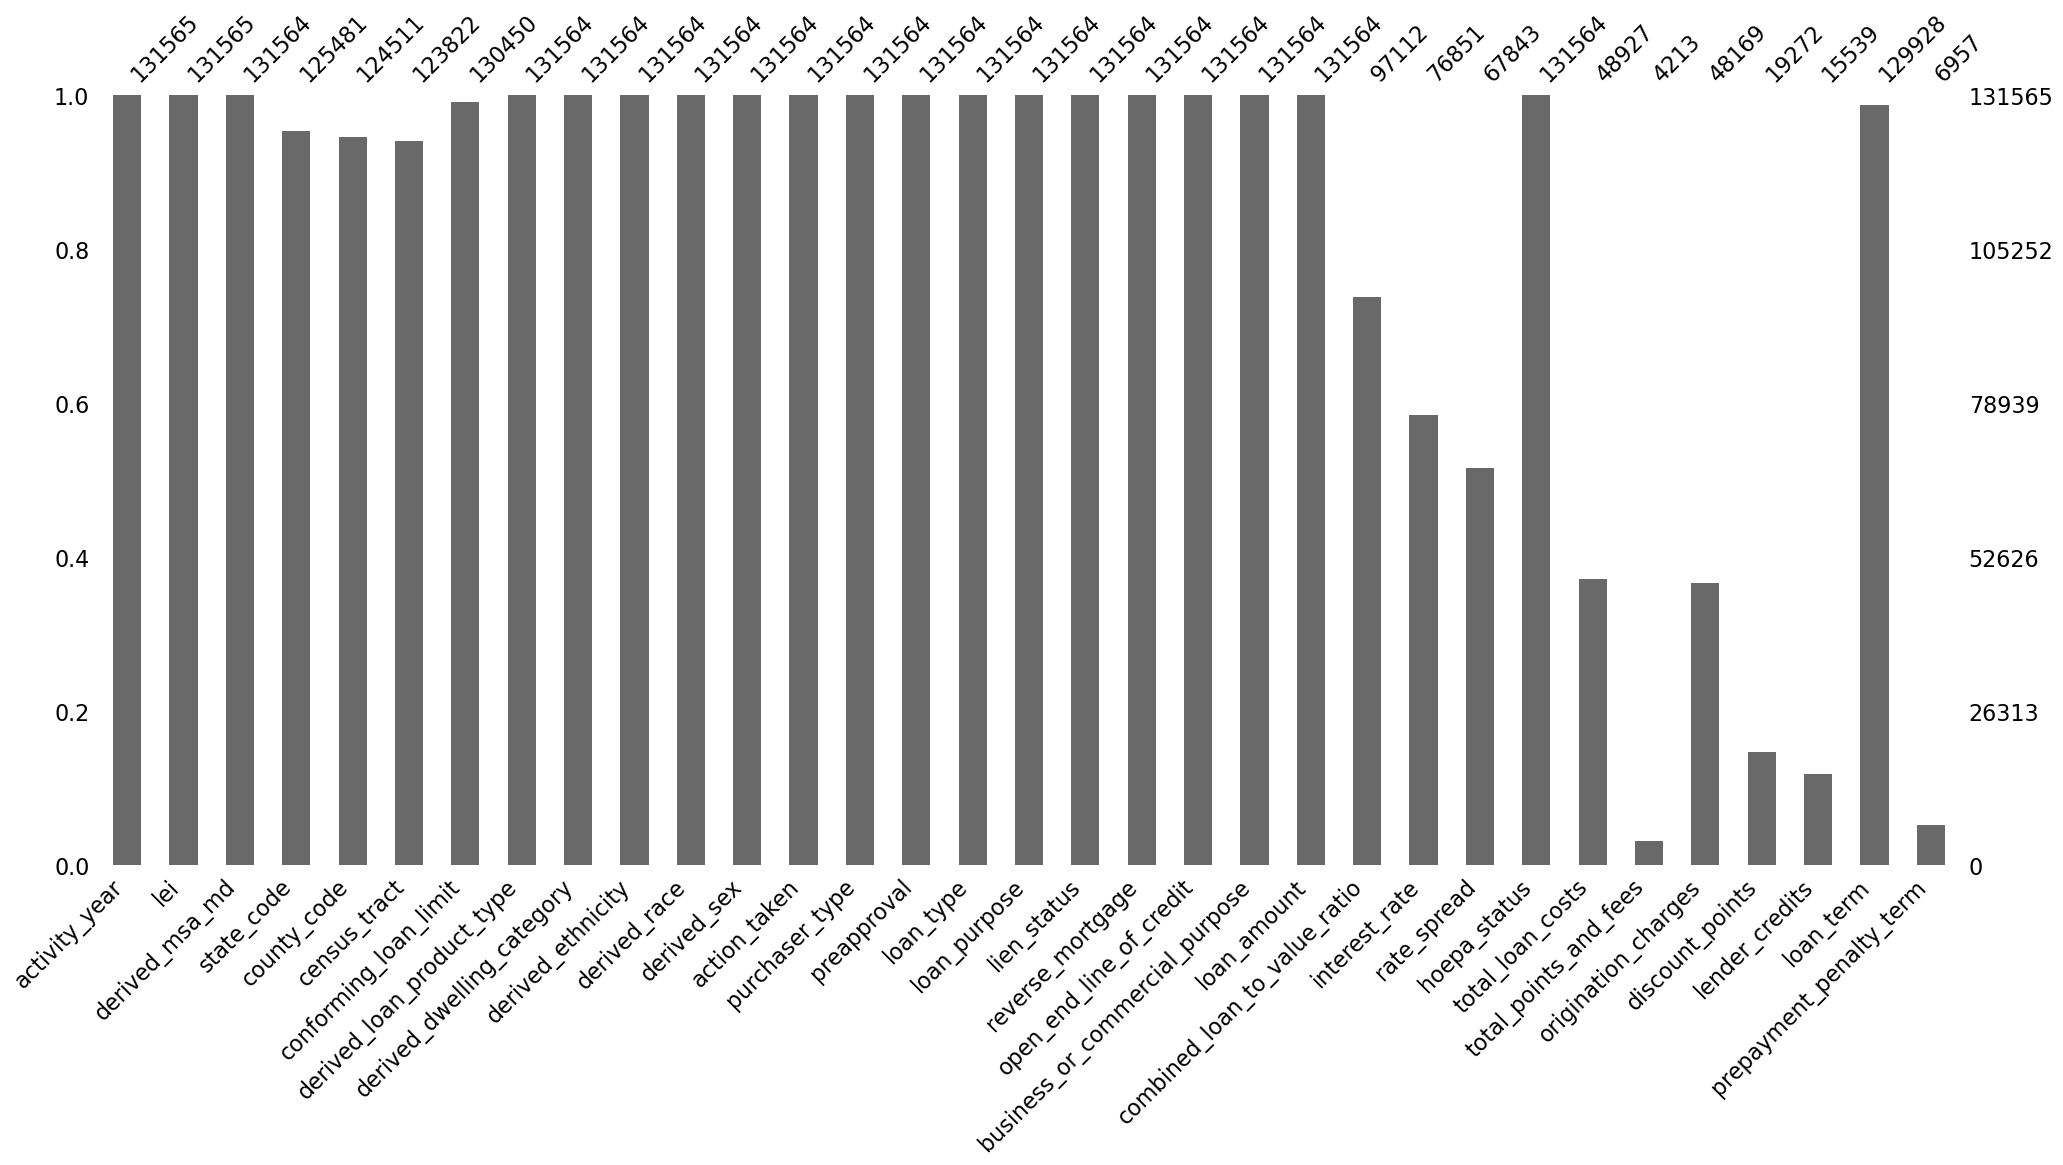

In [9]:
msno.bar(df[first_group])

<Axes: >

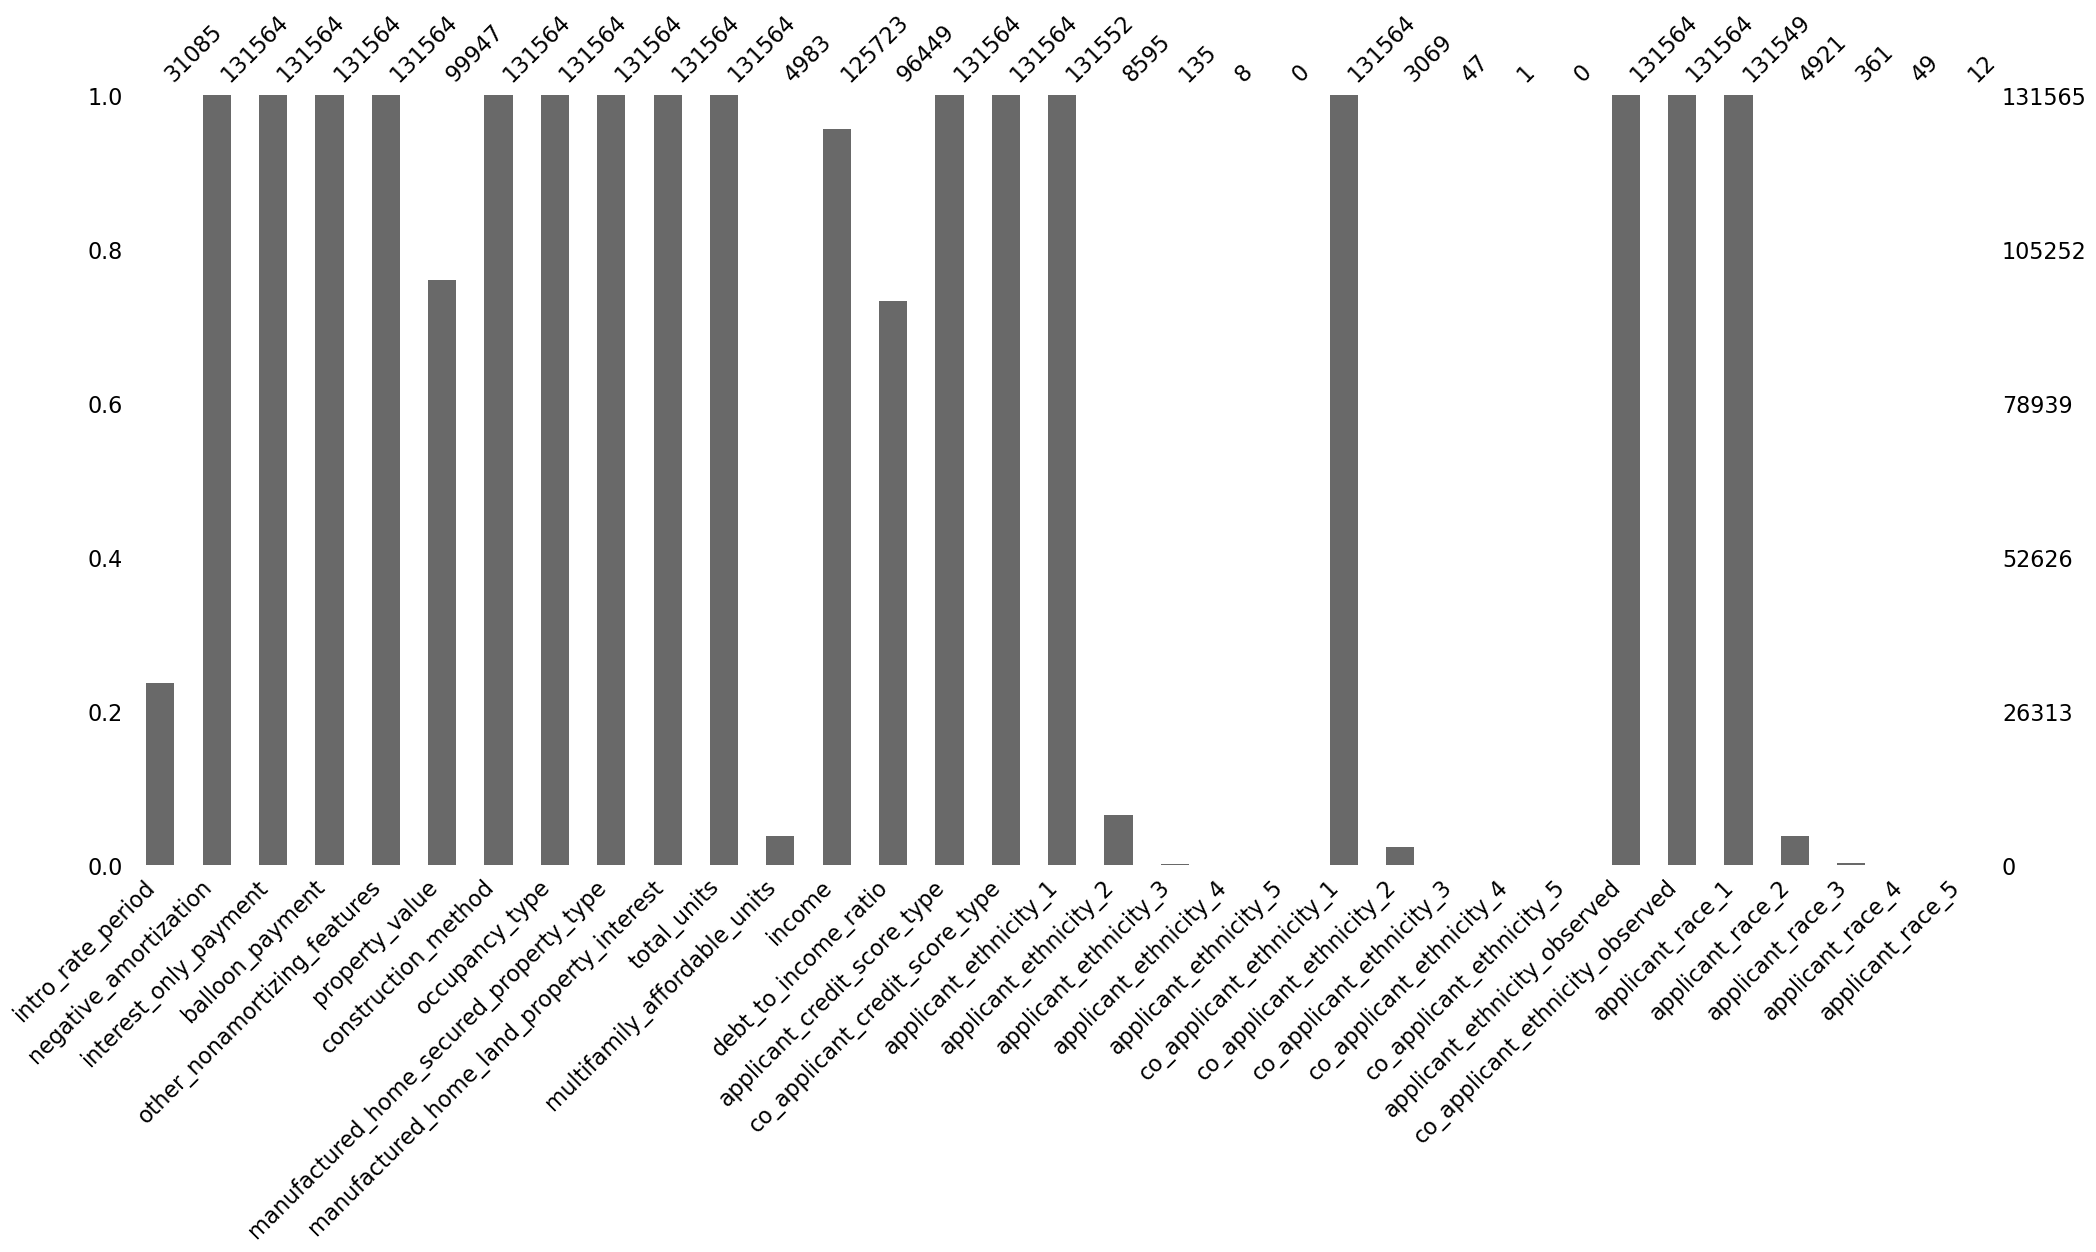

In [10]:
msno.bar(df[middle_group])

<Axes: >

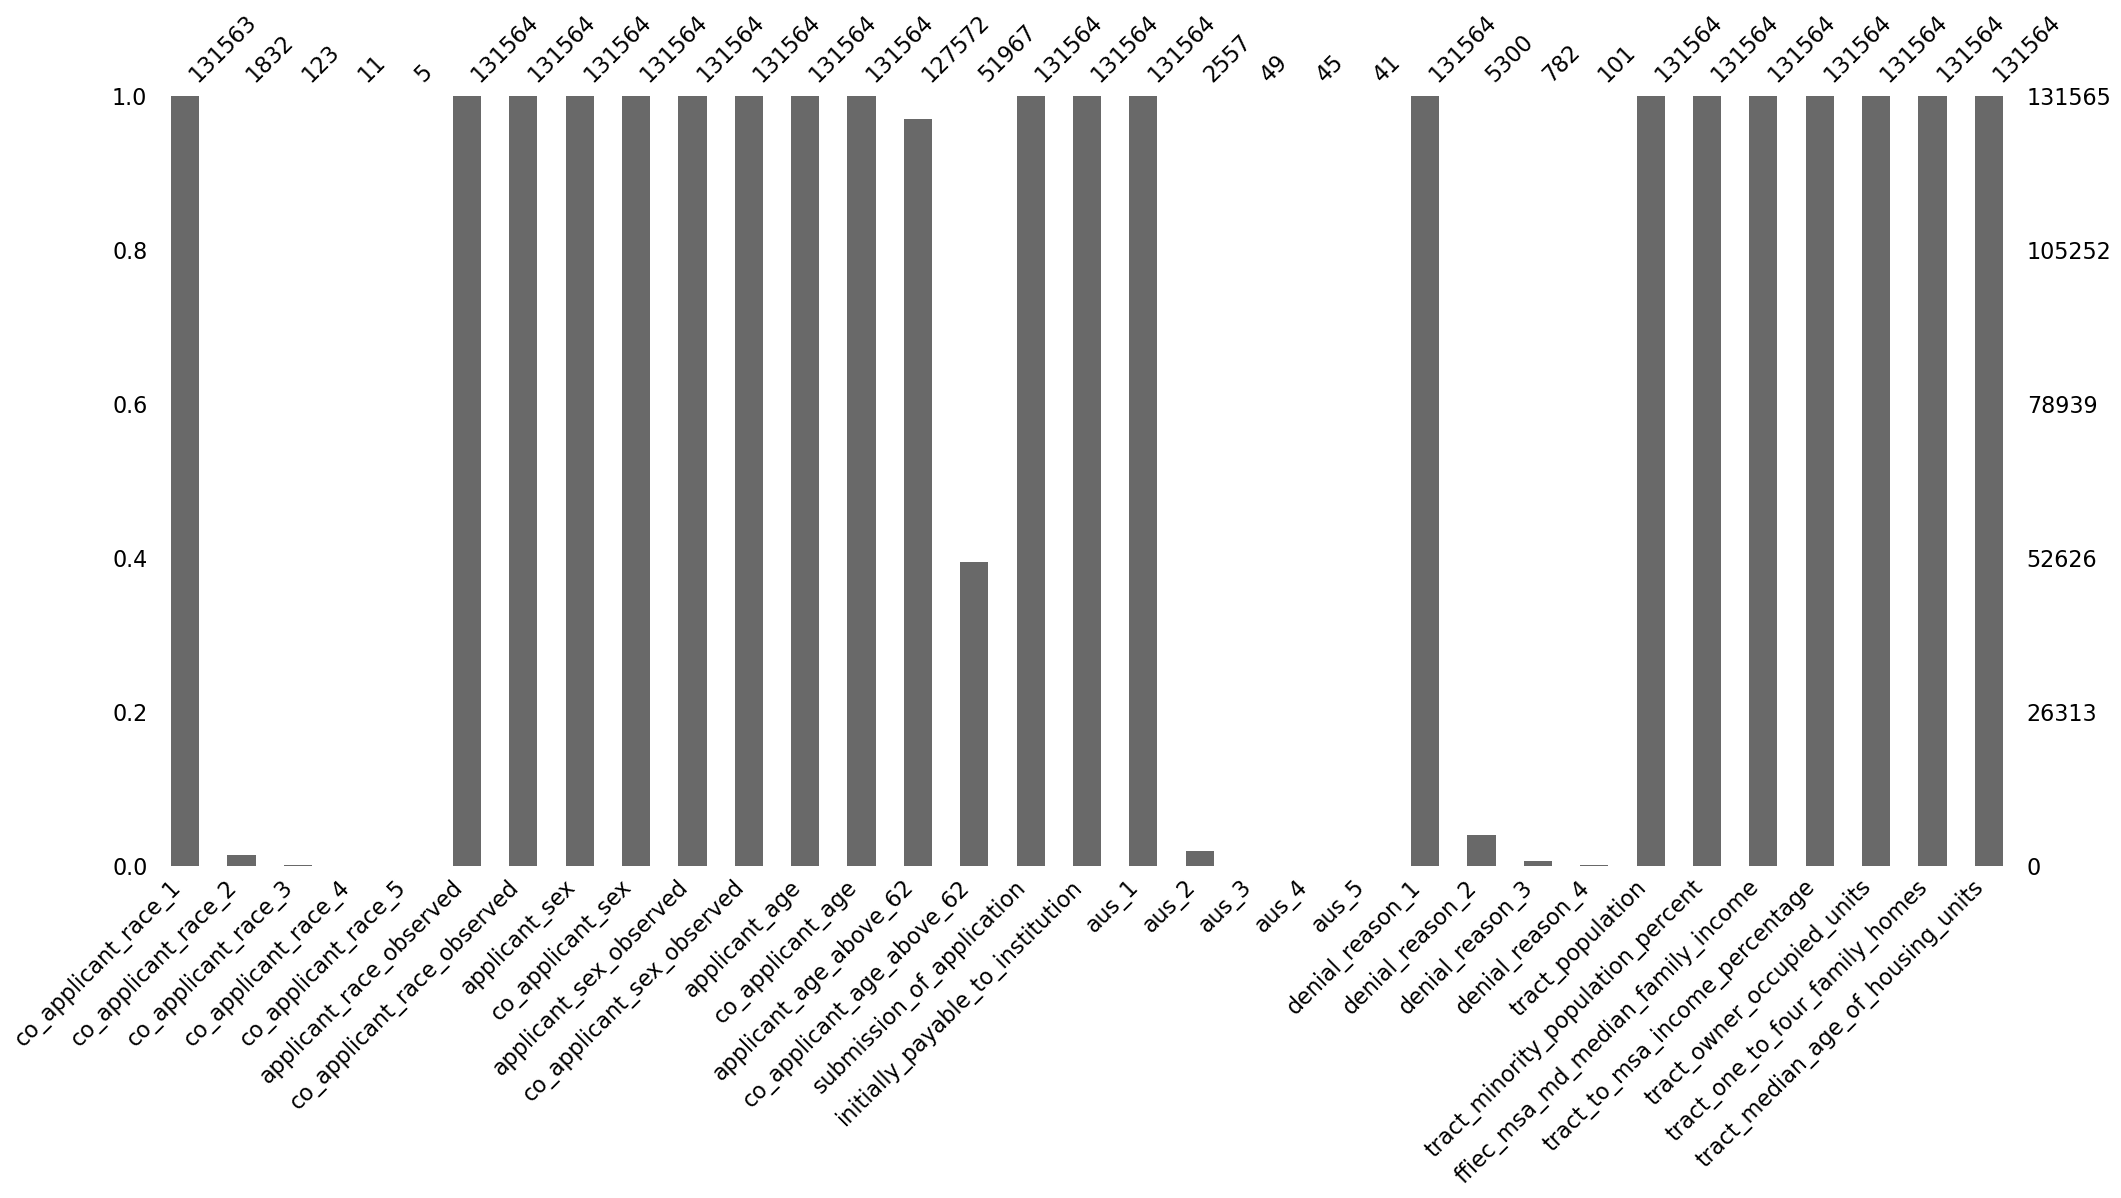

In [11]:
msno.bar(df[last_group])

Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.62x0.77)


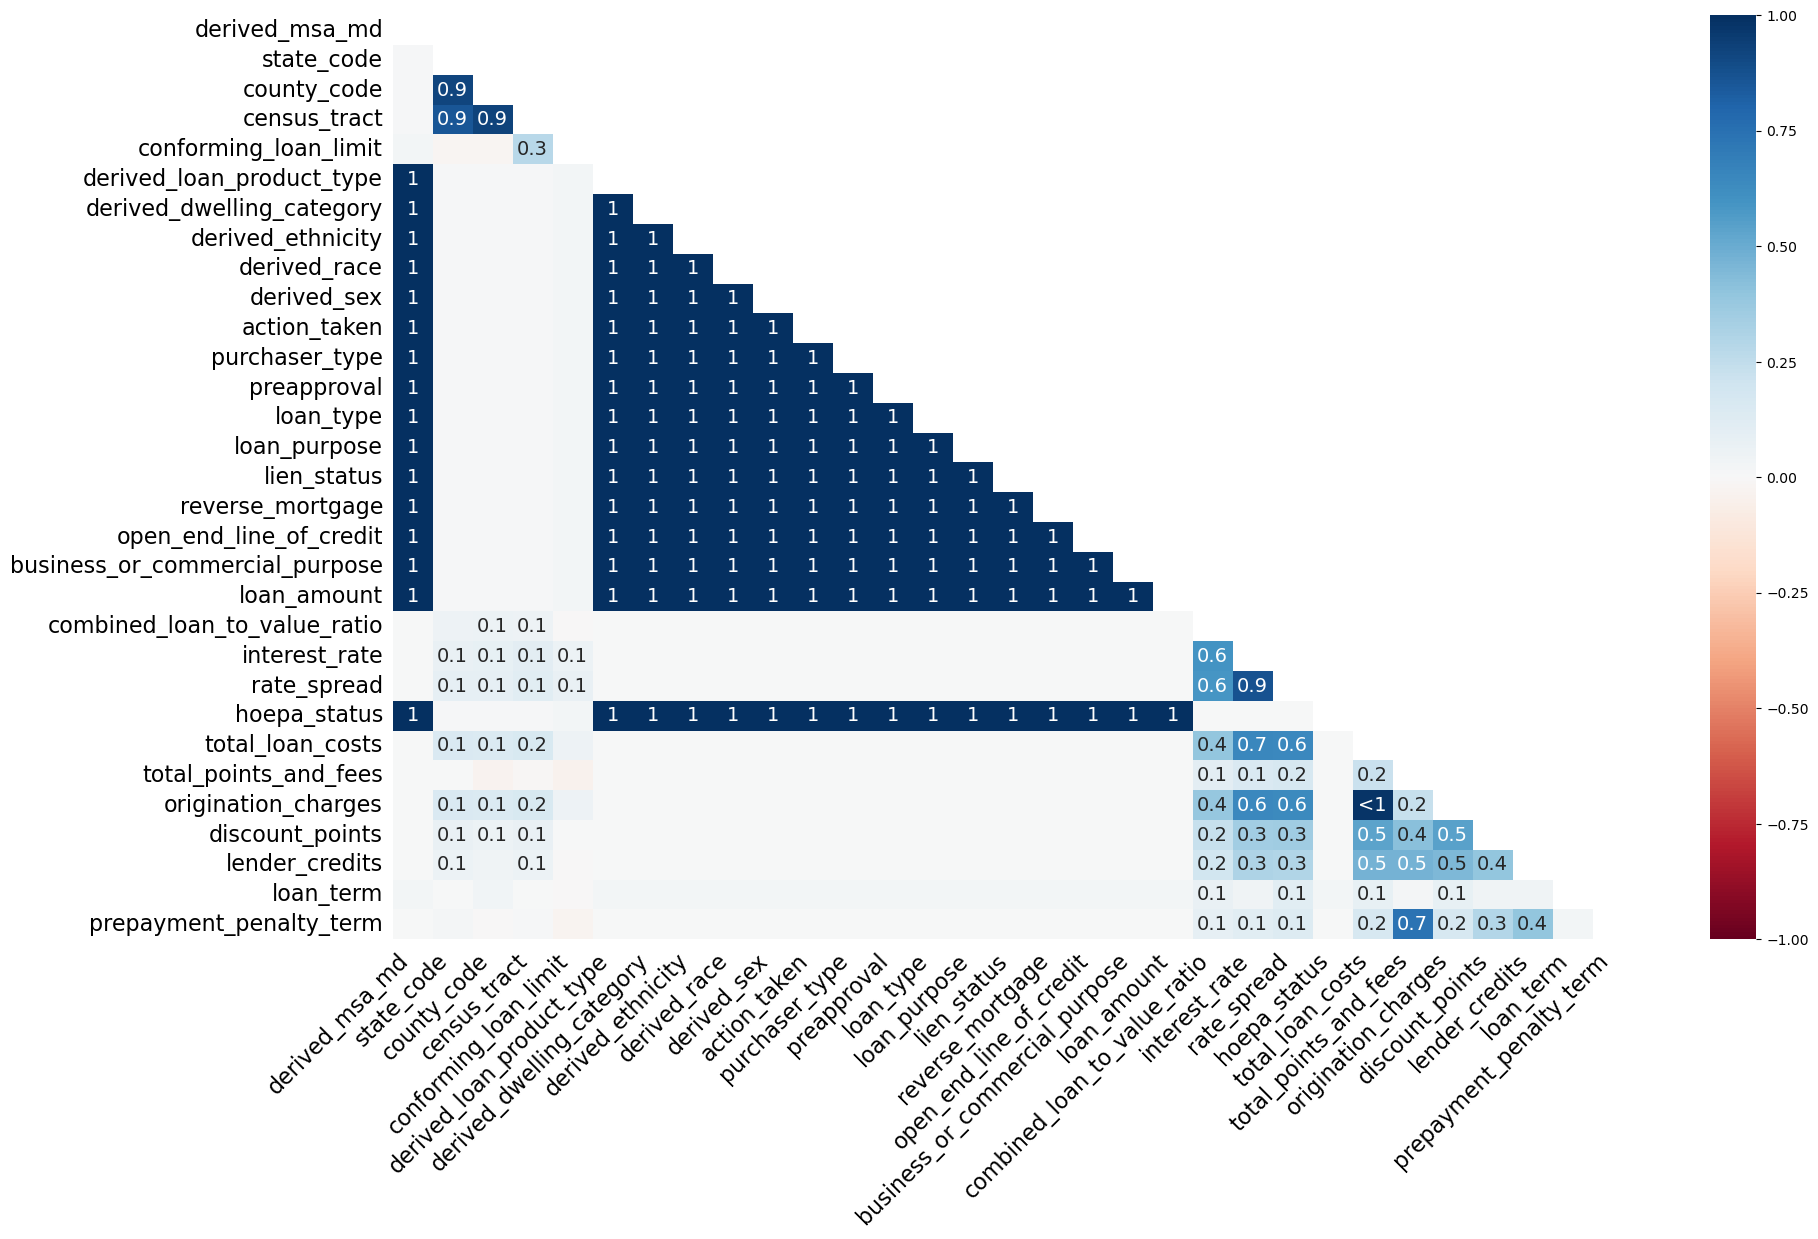

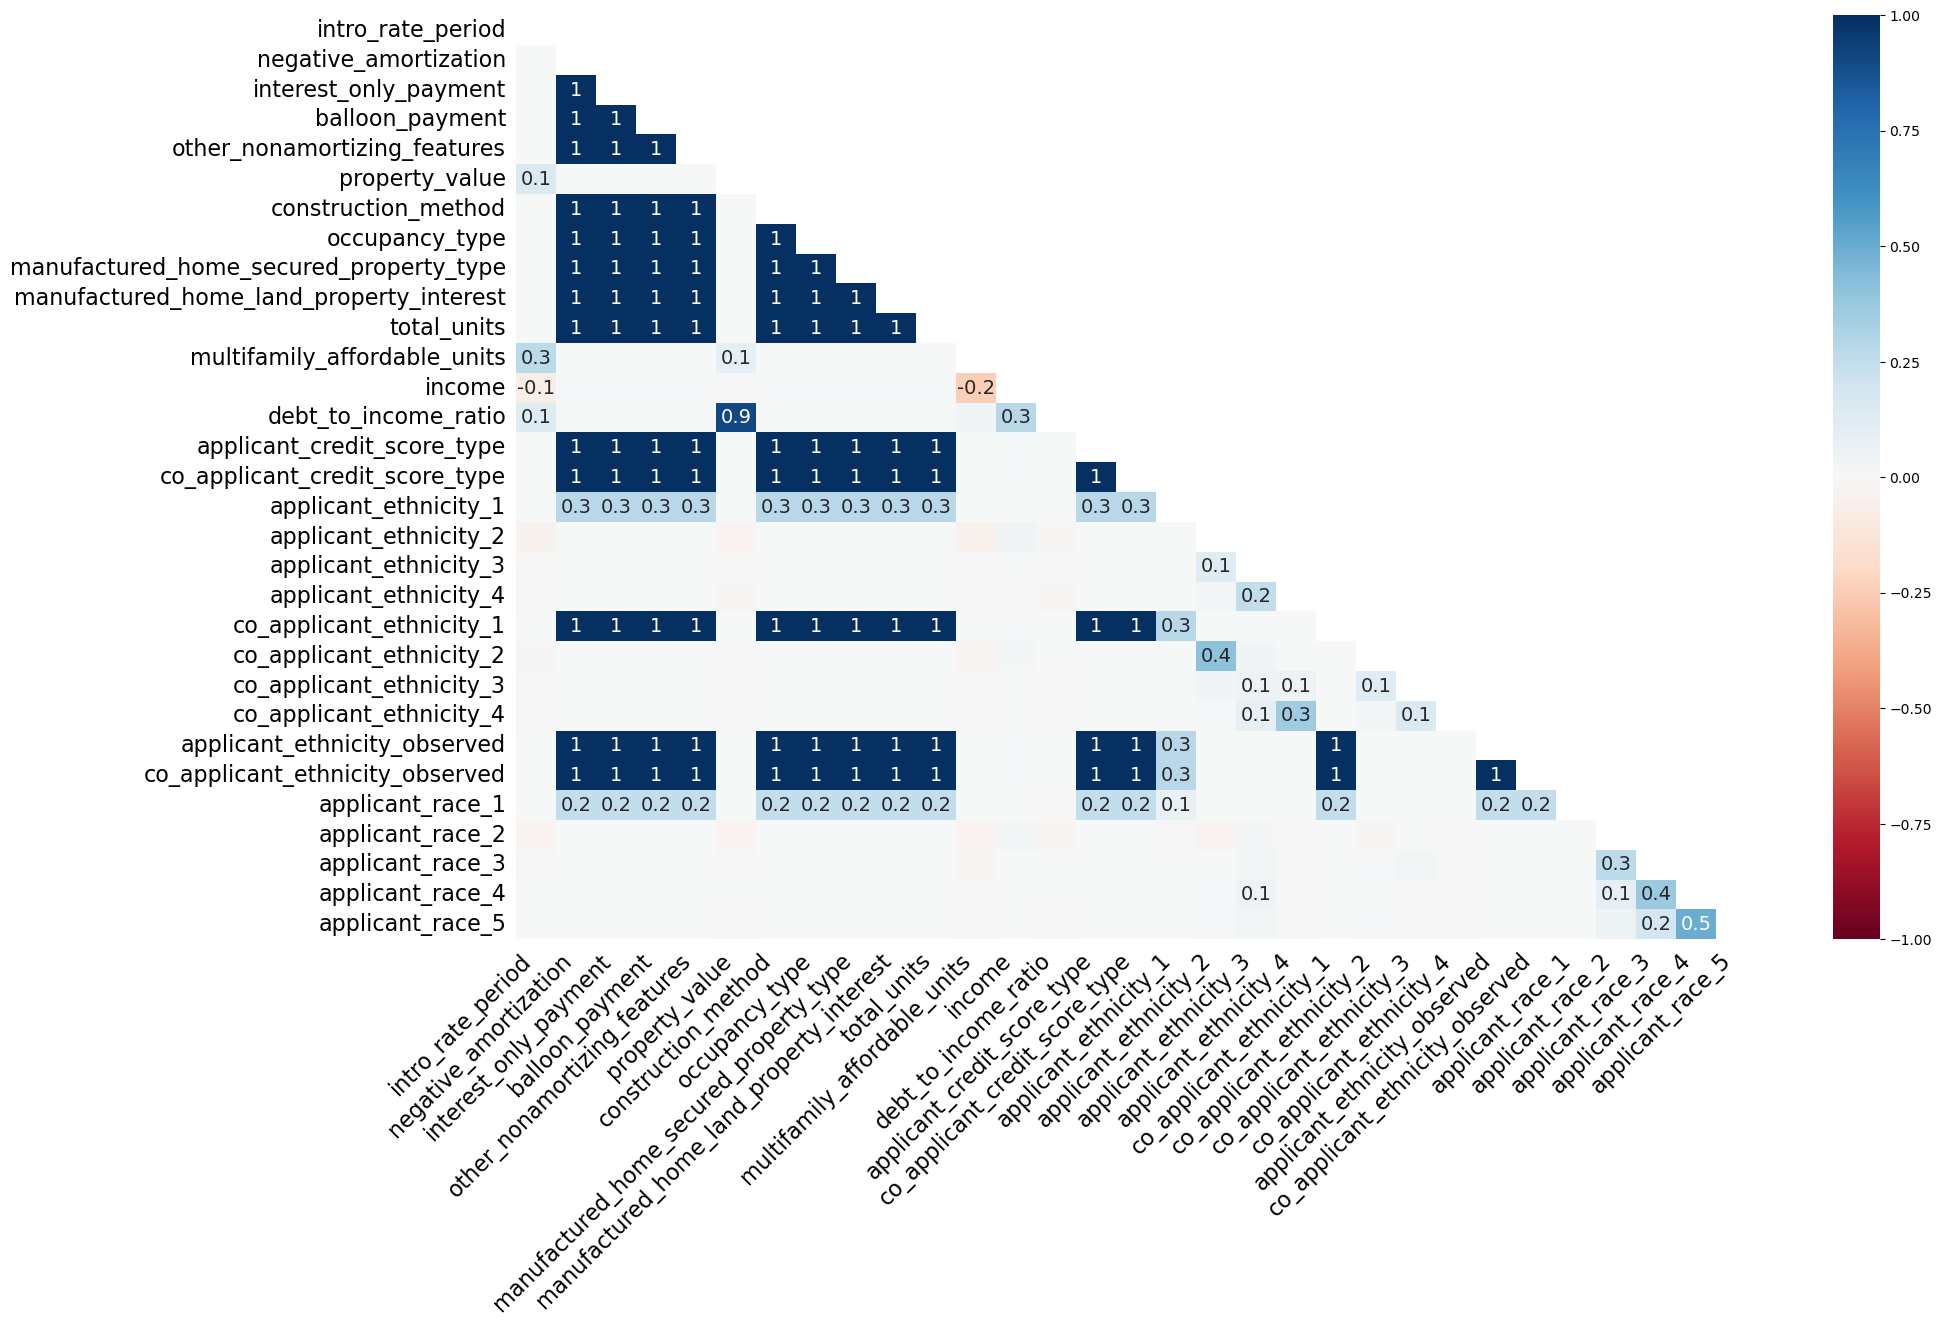

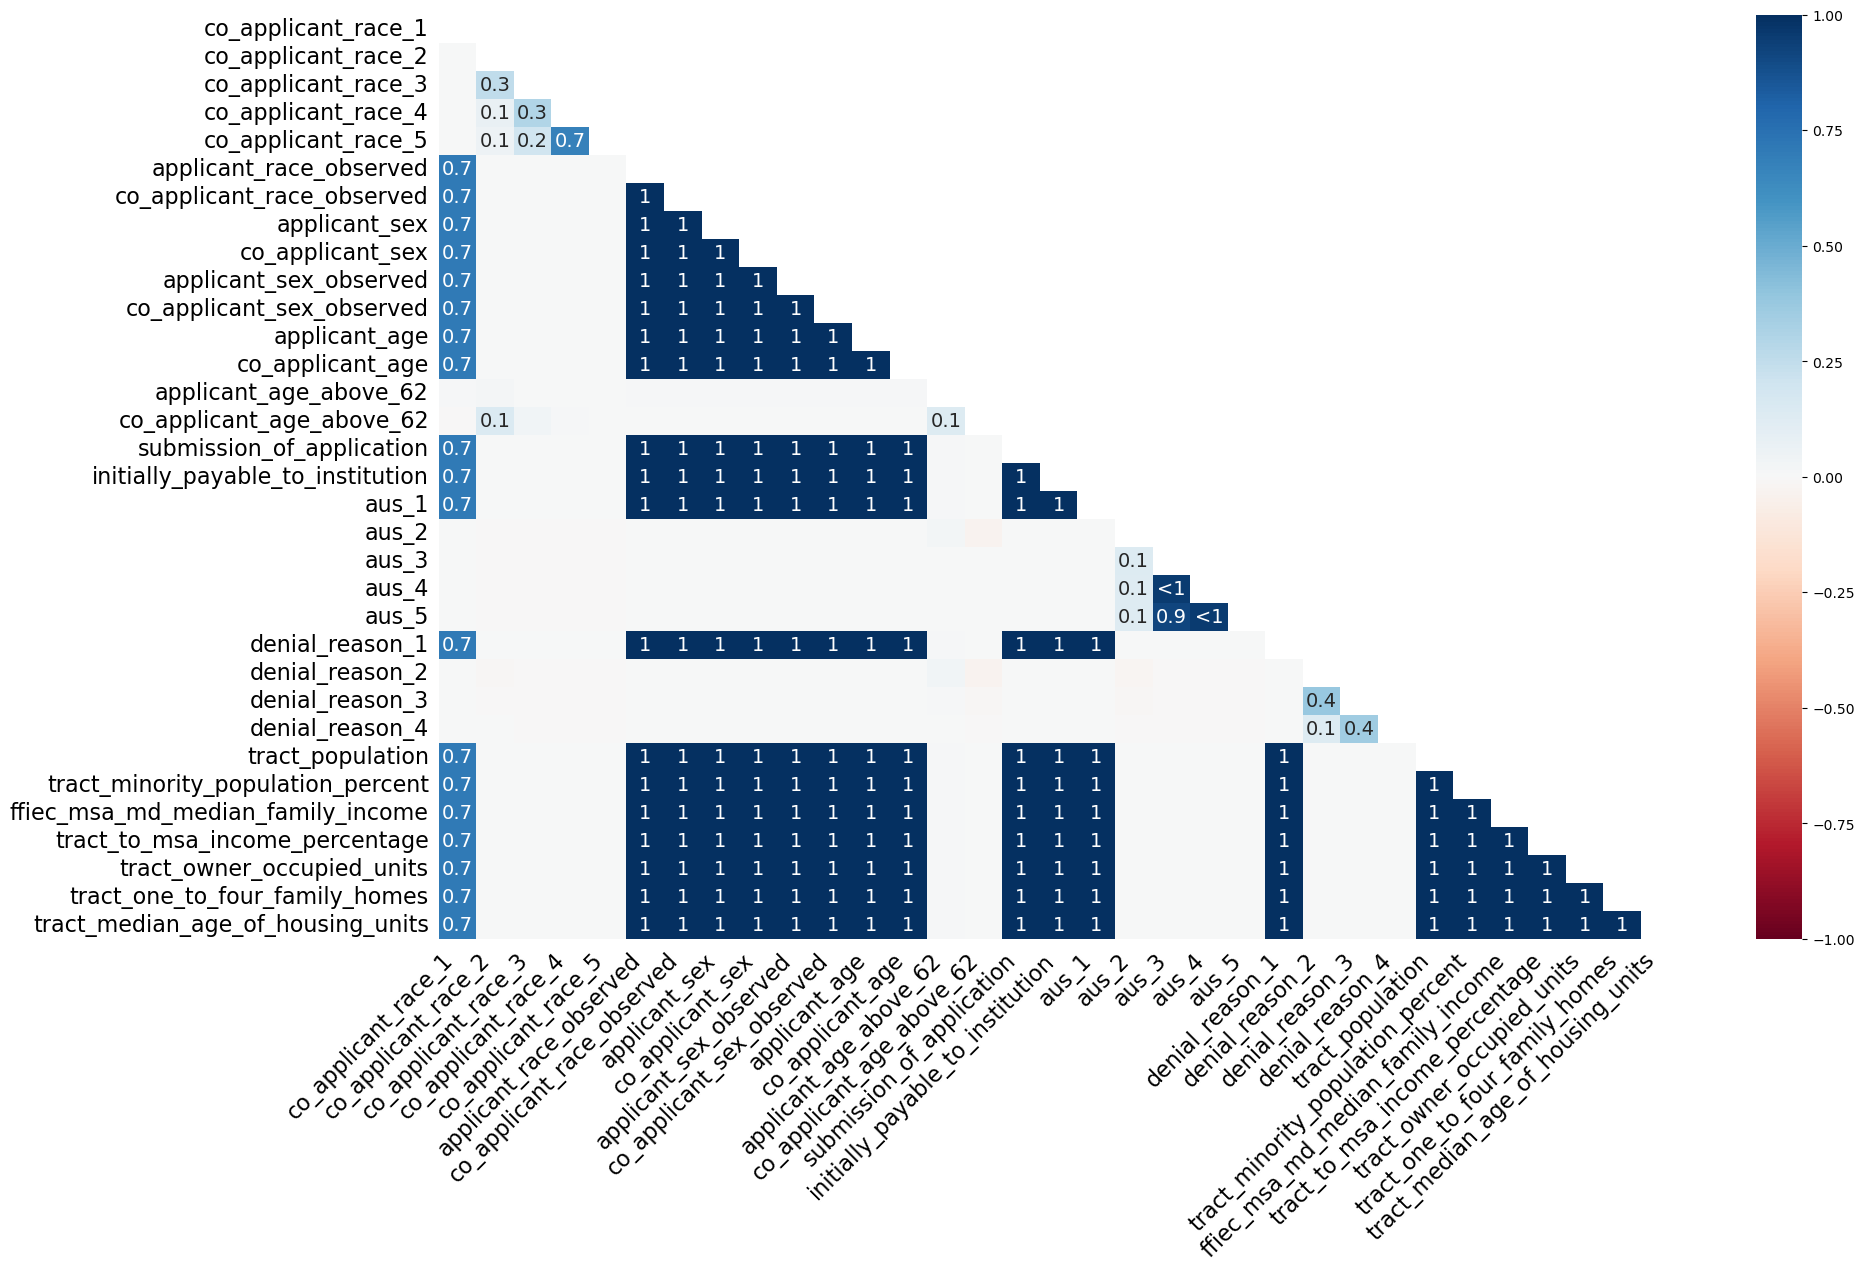

In [12]:
print(msno.heatmap(df[first_group]))
print(msno.heatmap(df[middle_group]))
print(msno.heatmap(df[last_group]))

In [13]:
df.columns

Index(['activity_year', 'lei', 'derived_msa_md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open_end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'combined_loan_to_value_ratio', 'interest_rate',
       'rate_spread', 'hoepa_status', 'total_loan_costs',
       'total_points_and_fees', 'origination_charges', 'discount_points',
       'lender_credits', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'other_nonamortizing_features', 'property_value',
       'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_in

### Demographics within our dataset:

In [25]:
df.derived_race.value_counts(normalize=True) * 100

derived_race
White                                        65.175124
Race Not Available                           19.989511
Black or African American                     8.432398
Asian                                         3.959290
Joint                                         1.621264
American Indian or Alaska Native              0.455292
Native Hawaiian or Other Pacific Islander     0.205983
2 or more minority races                      0.149737
Free Form Text Only                           0.011401
Name: proportion, dtype: float64

In [29]:
df.derived_ethnicity.value_counts(normalize=True) * 100

derived_ethnicity
Not Hispanic or Latino     67.745736
Ethnicity Not Available    20.290505
Hispanic or Latino         10.069624
Joint                       1.885014
Free Form Text Only         0.009121
Name: proportion, dtype: float64

In [26]:
df.derived_sex.value_counts(normalize=True) * 100

derived_sex
Joint                33.792679
Male                 26.825727
Female               20.010033
Sex Not Available    19.371561
Name: proportion, dtype: float64

### Descriptive Stats:

In [14]:
df.describe()

,activity_year,derived_msa_md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,131565.0,131564.000000,124511.000000,1.238220e+05,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000,...,5300.000000,782.000000,101.000000,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000,131564.000000
mean,2023.0,42167.989754,30440.602742,3.045978e+10,2.385402,5.188623,1.934739,1.275607,13.776170,1.338360,...,3.839057,5.613811,7.257426,4452.631921,34.594831,94409.333860,99.227126,1140.448177,1550.060039,36.633418
std,0.0,27022.839692,17092.915335,1.710513e+10,1.684337,17.171636,0.246987,0.562210,14.727251,0.473153,...,2.713456,2.596997,1.937284,2179.445665,28.421358,29960.098921,43.297764,599.094554,747.553444,20.143288
min,2023.0,10180.000000,1001.000000,1.001020e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2023.0,24340.000000,12133.000000,1.213397e+10,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,4.000000,7.000000,3225.000000,12.210000,84100.000000,77.300000,756.000000,1118.000000,23.000000
50%,2023.0,35154.000000,34009.000000,3.400902e+10,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,...,3.000000,6.000000,7.000000,4364.000000,25.260000,97300.000000,99.100000,1111.000000,1535.000000,38.000000
75%,2023.0,42220.000000,42101.000000,4.210103e+10,4.000000,0.000000,2.000000,1.000000,32.000000,2.000000,...,6.000000,7.000000,9.000000,5659.000000,51.490000,108500.000000,123.030000,1514.000000,1988.000000,51.000000
max,2023.0,99999.000000,78030.000000,7.803096e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,...,9.000000,9.000000,9.000000,30199.000000,100.000000,185400.000000,516.200000,6276.000000,8233.000000,80.000000


## Predictive Analysis:

### Approach:

The task we're trying to achieve is seeing whether or not an individual should be approved for a loan. Columns in our dataset that help represent the fact that someone has been given/denied approval are: denial_reason_1, denial_reason_2,	denial_reason_3, and denial_reason_4. Each of these columns have one of ten values that indicate a specific reason to be disapproved for a loan: 
1. Debt-to-income ratio
2.  Employment history
3. Credit history
4. Collateral
5. Insufficient cash (downpayment, closing costs)
6.  Unverifiable information
7.  Credit application incomplete
8.  Mortgage insurance denied
9.  Other
10.  Not applicable (indicates that they were approved)

From this, if even one of these columns have a value of 1-9 (or is a missing values like a NaN) then we mark that individual as being disapproved, otherwise we mark them as approved for a loan.

As for the features, we would probably not want attributes based on information that can be seen as discriminatory, such as: age, ethnicity, race, or sex. Features we would want to make use of are: income, debt_to_income_ratio, etc.


A baseline we would want to implement first is a logistic regression model. Depending on the results, ...

The metrics ...

- Columns that indicate a person got approved for a loan:

In [15]:
df[['denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'denial_reason_4']]

,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4
0,10.0,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN
2,10.0,NaN,NaN,NaN
3,10.0,NaN,NaN,NaN
4,10.0,NaN,NaN,NaN
...,...,...,...,...
131560,10.0,NaN,NaN,NaN
131561,10.0,NaN,NaN,NaN
131562,10.0,NaN,NaN,NaN
131563,10.0,NaN,NaN,NaN


- Should drop rows that don't indicate on whether or not a person recieved a loan

- Looking at people who were approved:
    - 10 = Not applicable (N/A only present in denial reason #1)

In [16]:
df = df.loc[:, df.isnull().sum() <= 10000]

In [20]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (if needed)

df.isnull().sum()

activity_year                                  0
lei                                            0
derived_msa_md                                 1
state_code                                  6084
county_code                                 7054
census_tract                                7743
conforming_loan_limit                       1115
derived_loan_product_type                      1
derived_dwelling_category                      1
derived_ethnicity                              1
derived_race                                   1
derived_sex                                    1
action_taken                                   1
purchaser_type                                 1
preapproval                                    1
loan_type                                      1
loan_purpose                                   1
lien_status                                    1
reverse_mortgage                               1
open_end_line_of_credit                        1
business_or_commerci

In [28]:
float_column_names = df.select_dtypes(include=['float64']).columns
print(float_column_names)

Index(['derived_msa_md', 'county_code', 'census_tract', 'action_taken',
       'purchaser_type', 'preapproval', 'loan_type', 'loan_purpose',
       'lien_status', 'reverse_mortgage', 'open_end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'hoepa_status',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'income',
       'applicant_credit_score_type', 'co_applicant_credit_score_type',
       'applicant_ethnicity_1', 'co_applicant_ethnicity_1',
       'applicant_ethnicity_observed', 'co_applicant_ethnicity_observed',
       'applicant_race_1', 'co_applicant_race_1', 'applicant_race_observed',
       'co_applicant_race_observed', 'applicant_sex', 'co_applicant_sex',
       'applicant_sex_observed', 'co_applicant_sex_observed',
       'submission_of_applicatio

In [21]:
df.loc[df.denial_reason_1 == 10, 'got_loan'] = 1 # True
df.loc[df.denial_reason_1 != 10, 'got_loan'] = 0 # False

approved = (df['got_loan'] == 1).sum()
denied = (df['got_loan'] == 0).sum()

print(approved, denied)

104461 27104


In [48]:
select = df[['lei', 'preapproval', 'loan_type', 'loan_amount', 'income', 'initially_payable_to_institution']]
numeric = list(select.select_dtypes(include=['float64']).columns)

X = df[['lei', 'preapproval', 'loan_type', 'loan_amount', 'income', 'initially_payable_to_institution']]
y = df['got_loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [49]:
def make_model(classifier):
    numeric_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ])

    preproc = ColumnTransformer(transformers=[
        ('number', numeric_pipeline, numeric)
    ])

    pl = Pipeline([
        ('preprocessor', preproc),
        ('model', classifier)
    ])

    return pl

# fit model to train data
def model_fit(model):
    model = make_model(model)
    model.fit(X_train, y_train)
    return model

In [50]:
lgbm_base_model = model_fit(lgbm.LGBMClassifier(task='predict', boosting_type='gbdt'))
rfc_base_model = model_fit(rfc())

print("LightGBM Base Accuracy: " + str(np.mean(cross_val_score(lgbm_base_model, X, y, cv=10))))
print("Random Forest Classifier Base Accuracy: " + str(np.mean(cross_val_score(rfc_base_model, X, y, cv=10))))

[LightGBM] [Info] Number of positive: 78350, number of negative: 20323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 98673, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.794037 -> initscore=1.349433
[LightGBM] [Info] Start training from score 1.349433
[LightGBM] [Info] Number of positive: 94014, number of negative: 24394
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 118408, number of used features: 5
[LightGBM] [Info] [bina

In [40]:
# lgbm tuning
lgbm_pl = make_model(lgbm.LGBMClassifier(task='predict', boosting_type='gbdt'))

parameterslgbm = {
                'model__num_iterations': [200, 400],
                'model__learning_rate': [0.05, 0.1, .15, .18],
                'model__num_leaves': [30, 34, 40],
                'model__n_estimators': [20, 24, 30],
                'model__feature_fraction': [0.85, 0.9, 0.95],
                'model__bagging_fraction': [0.9, 0.95, 1],
                'model__bagging_freq': [150, 180, 200, 220]
                }

lgbm_grid = GridSearchCV(lgbm_pl,
                        parameterslgbm,
                        scoring='accuracy',
                        cv = 3,
                        verbose=False,
                        n_jobs=15,
                        )

lgbm_grid.fit(X, y)

print(lgbm_grid.best_params_)

c:\Users\Game\anaconda3\envs\158a2\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=150, subsample_freq=0 will be ignored. Current value: bagging_freq=150
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=150, subsample_freq=0 will be ignored. Current value: bagging_freq=150
[LightGBM] [Info] Number of positive: 104461, number of negative: 27104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

c:\Users\Game\anaconda3\envs\158a2\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=150, subsample_freq=0 will be ignored. Current value: bagging_freq=150
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=150, subsample_freq=0 will be ignored. Current value: bagging_freq=150
[LightGBM] [Info] Number of positive: 78350, number of negative: 20323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

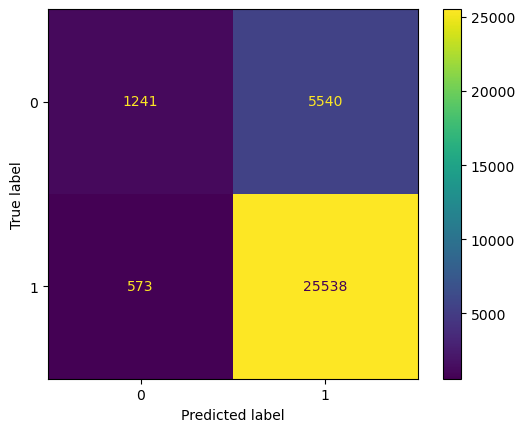

In [51]:
model_lgbm_tuned = model_fit(lgbm.LGBMClassifier(task='predict',
                                                   boosting_type='gbdt',
                                                   bagging_fraction=.95,
                                                   bagging_freq=150,
                                                   feature_fraction=0.9,
                                                   learning_rate=0.05,
                                                   n_estimators=20,
                                                   num_iterations=200,
                                                   num_leaves=30))

lgbm_preds = model_lgbm_tuned.predict(X_test)
print(classification_report(y_test, lgbm_preds))

cm = confusion_matrix(y_test, lgbm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [52]:
rfc_pl = make_model(rfc())

parametersrfc = {
    'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20, 30, 40],  # Maximum depth of each tree
    'model__min_samples_split': [2, 4, 5],  # Minimum samples required to split a node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'model__max_features': ['auto', 'sqrt', 'log'],  # Number of features to consider for the best split
    'model__bootstrap': [True],  # Whether to bootstrap samples when building trees
    'model__criterion': ['gini', 'entropy']  # Stopping rule     
}

rfc_grid = GridSearchCV(rfc_pl,
                        parametersrfc,
                        scoring='accuracy',
                        cv = 5,
                        verbose=False,
                        n_jobs=15
                        )

rfc_grid.fit(X, y)

print(rfc_grid.best_params_)

c:\Users\Game\anaconda3\envs\158a2\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2700 fits failed out of a total of 4050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Game\anaconda3\envs\158a2\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Game\anaconda3\envs\158a2\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Game\anaconda3\envs\158a2\Lib\site-packages\sklearn\pipeline.py", l

{'model__bootstrap': True, 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 100}


              precision    recall  f1-score   support

         0.0       0.70      0.17      0.27      6781
         1.0       0.82      0.98      0.89     26111

    accuracy                           0.81     32892
   macro avg       0.76      0.57      0.58     32892
weighted avg       0.79      0.81      0.76     32892



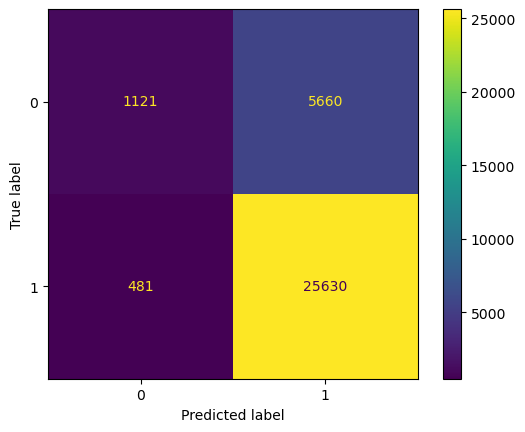

In [53]:
model_rfc = rfc(bootstrap=True,
                                criterion='entropy',
                                max_depth=10,
                                max_features='sqrt',
                                min_samples_leaf=4,
                                min_samples_split=2,
                                n_estimators=100)
model_rfc_tuned = model_fit(model_rfc)

rfc_preds = model_rfc_tuned.predict(X_test)
print(classification_report(y_test, rfc_preds))

cm = confusion_matrix(y_test, rfc_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Model Explanation:

Gradient Boosting vs Ensemble Learning Model

## Literature Review:

This dataset was taken from reports in 2023 under the Home Mortgage Disclosure Act (HMDA), which requires financial institutions to maintain, report, and publicly disclose loan-level information about mortgages. The data used in this project was modified by the Consumer Financial Protection Bureau (CFPB) to protect applicant and borrower privacy.

Recent research sheds light on advancements in credit scoring methodologies and their implications for predicting mortgage loan approvals. Markov, Seleznyova, and Lapshin (2022) discuss the transition from traditional statistical models, like logistic regression, to machine learning approaches, such as decision trees, neural networks, and ensemble methods. These advanced models offer higher predictive accuracy and the ability to handle complex, nonlinear relationships in data, which are critical for assessing mortgage loan eligibility. Moreover, the growing adoption of explainable AI ensures transparency in these decisions, addressing regulatory requirements and building trust in automated decision-making systems. The authors also stress the importance of mitigating biases during model training, as biased data can lead to discriminatory outcomes—an essential consideration for equitable mortgage lending practices.

Building on these insights, Litty (2024) explores the integration of alternative data sources in credit risk assessment. Data such as social media activity, mobile phone usage, and psychometric indicators can provide a more comprehensive view of an applicant’s financial behavior, particularly for those with limited credit histories. This is particularly relevant in the context of mortgage loan approvals, as it improves financial inclusion for traditionally underserved populations. AI-powered models are effective in analyzing these unstructured data sources, offering deeper insights into potential borrowers’ creditworthiness. However, Litty also warns of privacy and security risks associated with using such personal data, underscoring the need for robust data governance frameworks in mortgage underwriting processes.

Adding to these findings, Ndayisenga (2021) specifically investigates the application of machine learning algorithms for loan approval predictions. His research evaluates models such as Decision Trees, Random Forest, and ensemble methods like AdaBoost, which outperformed others with an impressive 99.99% accuracy. The study’s dataset, containing attributes similar to those in HMDA data (e.g., loan amount, income, credit scores), highlights the utility of machine learning in capturing complex patterns and improving decision-making in financial lending. These insights are directly applicable to predicting mortgage loan approvals, as the use of advanced techniques, coupled with regulatory-compliant transparency, ensures both efficiency and fairness in lending practices.

Together, these studies emphasize the transformative potential of machine learning and alternative data in advancing mortgage loan approval predictions. By leveraging the diverse features within the HMDA dataset, this project aims to develop accurate and explainable models that align with industry standards and promote equitable lending outcomes.

### References:
Litty, Abi. "Beyond Traditional Credit Scoring: Developing AI-Powered Credit Risk Assessment Models Incorporating Alternative Data Sources." (2024).

Markov, Anton, Zinaida Seleznyova, and Victor Lapshin. "Credit scoring methods: Latest trends and points to consider." The Journal of Finance and Data Science 8 (2022): 180-201.

Ndayisenga, Theoneste. Bank loan approval prediction using machine learning techniques. Diss. 2021.

## Results and Conclusion: